In [39]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv('data/data-kiem-tra-2.csv')
df

,date,truong_1,truong_2,truong_3,truong_4,truong_5
0,10.05.2013,4,58,3773,299.0,1
1,26.05.2013,4,58,3768,249.0,1
2,19.05.2013,4,58,4036,419.0,1
3,25.05.2013,4,58,12878,149.0,1
4,15.05.2013,4,58,12885,148.0,1
...,...,...,...,...,...,...
550033,07.11.2013,10,37,18474,199.0,1
550034,18.11.2013,10,37,18474,199.0,1
550035,24.11.2013,10,37,18484,199.0,1
550036,11.11.2013,10,37,19751,99.0,1


In [41]:
df['truong_1'].unique()

array([ 4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [42]:
df['truong_2'].unique()

array([58, 59, 57, 54, 56, 55, 19, 50, 15, 14, 16, 12, 13, 10,  7, 18, 43,
       47,  4,  3,  5, 42,  2,  6, 30, 29, 31, 28, 44, 41, 45, 38, 46, 32,
       37, 35, 17, 25, 24, 26, 27, 22, 21, 53, 51, 52,  9], dtype=int64)

In [43]:
df['truong_3'].unique()

array([ 3773,  3768,  4036, ...,  7963,   783, 16591], dtype=int64)

In [44]:
df['truong_4'].unique()

array([  299.       ,   249.       ,   419.       , ..., 18254.70588  ,
         732.3333333,  2363.285714 ])

In [45]:
df['truong_5'].unique()

array([  1,   2,   3,  -1,   5,   8,   4,  16,   6,   9,   7,  10,  20,
        42,  28,  11,  14,  15,  19,  32,  37,  13,  25,  21,  18,  17,
        12,  31,  27,  35,  52,  29,  23,  -2,  30,  33,  38,  26,  22,
        36,  41,  24,  82,  44,  80,  34, 200, 100,  76,  39,  77,  47,
        40, 107,  56,  46,  50,  49,  70,  55,  60,  64,  45,  71,  65,
       150,  -3,  85,  57,  89,  43,  58, 217, 104,  84, 168,  92, 156,
        68,  48,  62, 264, 110,  83, 133,  51, 148,  54,  67, 106, 109,
        61, 102,  90, 288, 171, 131,  87,  78, 151,  59,  -6, 113, 118,
       127,  97, 135,  69], dtype=int64)

In [46]:
df.isnull().sum()

date        0
truong_1    0
truong_2    0
truong_3    0
truong_4    0
truong_5    0
dtype: int64

In [47]:
df.dtypes

date         object
truong_1      int64
truong_2      int64
truong_3      int64
truong_4    float64
truong_5      int64
dtype: object

In [48]:
df['date'] = pd.to_datetime(df['date'], format="%d.%m.%Y")
df

,date,truong_1,truong_2,truong_3,truong_4,truong_5
0,2013-05-10,4,58,3773,299.0,1
1,2013-05-26,4,58,3768,249.0,1
2,2013-05-19,4,58,4036,419.0,1
3,2013-05-25,4,58,12878,149.0,1
4,2013-05-15,4,58,12885,148.0,1
...,...,...,...,...,...,...
550033,2013-11-07,10,37,18474,199.0,1
550034,2013-11-18,10,37,18474,199.0,1
550035,2013-11-24,10,37,18484,199.0,1
550036,2013-11-11,10,37,19751,99.0,1


In [49]:
df['date'].max()

Timestamp('2013-11-30 00:00:00')

In [50]:
df['date'].min()

Timestamp('2013-05-01 00:00:00')

In [51]:
df = df.groupby('date').sum()
df

,truong_1,truong_2,truong_3,truong_4,truong_5
date,,,,,
2013-05-01,5868,42989,15073926,8.699411e+05,1635
2013-05-02,5352,39975,14127032,8.025867e+05,1503
2013-05-03,5136,38414,13050413,8.121575e+05,1413
2013-05-04,4448,34386,11324760,6.420660e+05,1213
2013-05-05,4296,33559,11814357,5.800663e+05,1159
...,...,...,...,...,...
2013-11-26,4510,13603,5119426,3.712670e+05,548
2013-11-27,4050,12428,4821249,3.011002e+05,489
2013-11-28,4660,13724,5349662,3.666039e+05,585


In [52]:
train_df = df[:-15]
test_df = df[-15:]

### SARIMA

In [33]:
SARIMA_model = auto_arima(train_df["truong_3"].values.reshape(-1,1), start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, 
                         m=6, #12 is the frequncy of the cycle
                         start_P=0, 
                         seasonal=True, #set to seasonal
                         d=None, 
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)
print(SARIMA_model.summary())

                                       SARIMAX Results                                        
Dep. Variable:                                      y   No. Observations:                  199
Model:             SARIMAX(3, 0, 3)x(0, 1, [1, 2], 6)   Log Likelihood               -3293.894
Date:                                Tue, 04 Jun 2024   AIC                           6607.788
Time:                                        11:23:23   BIC                           6640.415
Sample:                                             0   HQIC                          6621.001
                                                - 199                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -7.598e+04    1.6e+05     -0.474      0.635    -3.9e+05    2.38e+05
ar.

In [34]:
sarima = SARIMAX(train_df['truong_3'].values.reshape(-1,1), 
                 order=(3,0,3),
                 seasonal_order=(0,1,1,6)).fit()
predictions = sarima.forecast(steps=15)

c:\Users\chimi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\chimi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [35]:
print(predictions)

[13567872.20421633  8766492.19063009  5522900.05023702  8993324.01111514
  9763000.33065032  6295071.28044943  7981220.69847396  9705939.05283633
  9134622.64251914  7257367.09037431  8014952.86789734  8191550.76267416
  8653017.40770317  8309658.48232327  9270764.61885987]


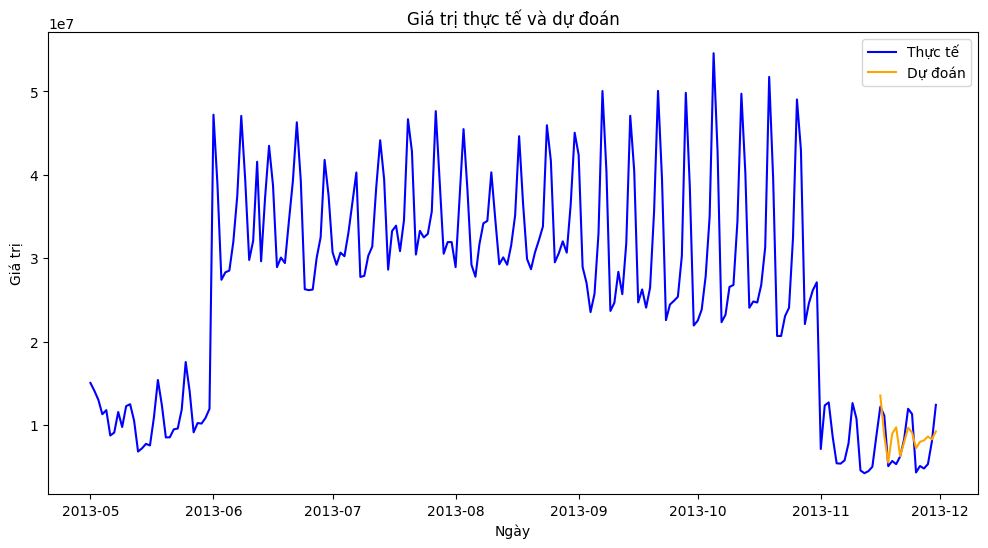

In [38]:
predicted_df = pd.DataFrame(predictions, index=test_df.index, columns=['predicted_truong3'])

plt.figure(figsize=(12, 6))

plt.plot(df['truong_3'], label='Thực tế', color='blue')

plt.plot(predicted_df['predicted_truong3'], label='Dự đoán', color='orange')

plt.xlabel('Ngày')
plt.ylabel('Giá trị')
plt.title('Giá trị thực tế và dự đoán')
plt.legend()
plt.show()

### ARIMAX

In [53]:
ARIMAX_model = auto_arima(train_df['truong_3'].values.reshape(-1,1), 
                   exogenous=train_df['truong_1'], 
                   trace=True, 
                   error_action="ignore", 
                   suppress_warnings=True)
print(ARIMAX_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6791.298, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6849.500, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6850.616, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6847.529, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6847.506, Time=0.00 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6798.768, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6787.824, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6841.130, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6812.367, Time=0.02 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6789.805, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=6813.181, Time=0.03 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=6808.081, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=6785.786, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=6839.131, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]          

In [60]:
arimax = SARIMAX(train_df['truong_3'].values.reshape(-1,1), 
                 order=(2,1,1),
                 exogenous=train_df['truong_1']).fit()
predictions = arimax.forecast(steps=15)

c:\Users\chimi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['exogenous']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [61]:
print(predictions)

[9243961.66582364 7923133.69866837 6860167.99971043 6802811.18716472
 7248878.25622454 7549971.26232691 7533638.0184111  7387192.25529828
 7304268.59475166 7319453.63310632 7366377.18691616 7388439.9301431
 7380794.48475838 7366086.36967588 7360477.84717577]


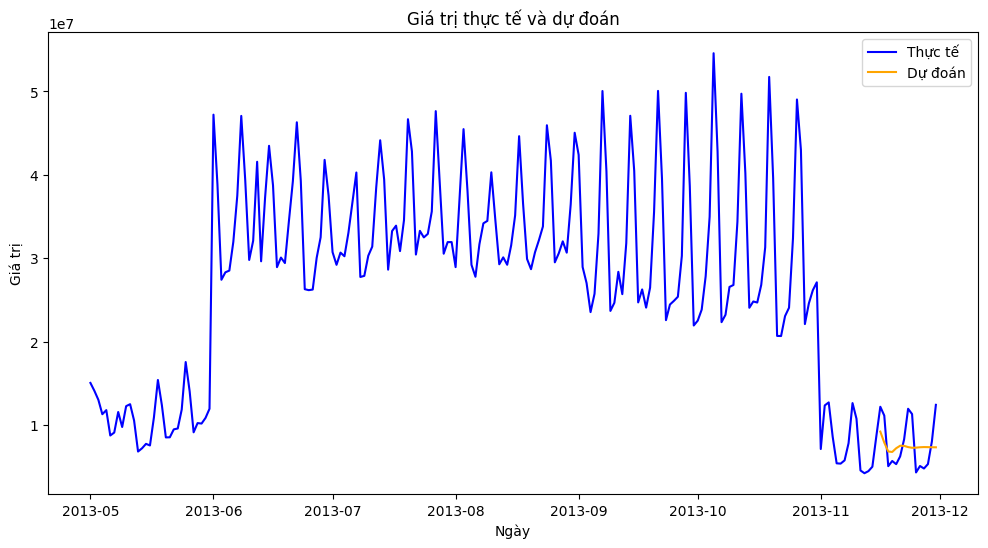

In [62]:
predicted_df = pd.DataFrame(predictions, index=test_df.index, columns=['predicted_truong3'])

plt.figure(figsize=(12, 6))

plt.plot(df['truong_3'], label='Thực tế', color='blue')

plt.plot(predicted_df['predicted_truong3'], label='Dự đoán', color='orange')

plt.xlabel('Ngày')
plt.ylabel('Giá trị')
plt.title('Giá trị thực tế và dự đoán')
plt.legend()
plt.show()